# Reading an image
it is important to know how to properly read an image after it has been saved.
It's a no-brainer, but a good script can save a lot of time

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import supreme as sp

#awojdyla@lbl.gov
#October 2020

# filename and metadata

In [2]:
filename = "01_test.tiff"

# pixel size
dx_m = 1e-6
# screen size
Dx_m = 2e-3-dx_m

### Reading the file

In [3]:
# read the image
im_tiff = Image.open(filename)
# make the image a numpy array so that we can process it
im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[0], im_tiff.size[1], 1))

### Plotting the image
Always be careful... maye sure you the right stuff!

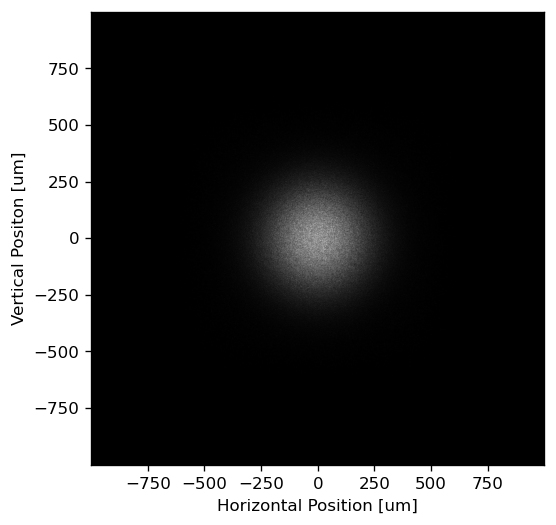

In [4]:
fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
extent = (-Dx_m/2 * 1e6, +Dx_m/2 * 1e6, -Dx_m/2 * 1e6, +Dx_m/2 * 1e6)
plt.imshow(im_np, extent=extent, cmap = 'gray')
plt.xlabel('Horizontal Position [um]')
plt.ylabel('Vertical Positon [um]')
plt.show()

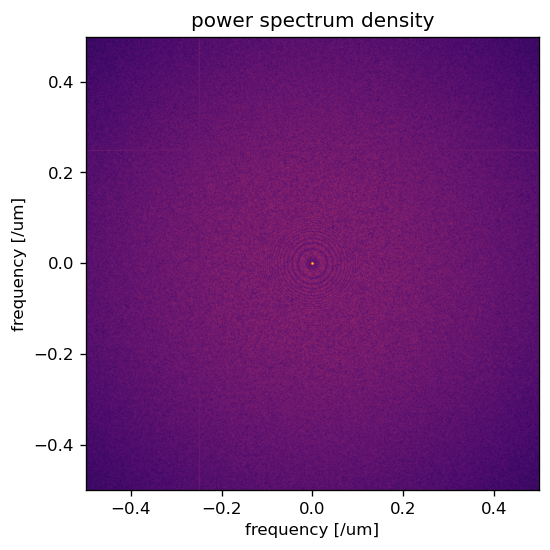

In [5]:
# take the Fourier Transform
IMG = sp.ft(im_np)

# removing zero frequencies (tend to dominate the signal), but just for display
IMG_d = IMG
IMG_d[498:503,:]=np.mean(abs(IMG))
IMG_d[:,498:503]=np.mean(abs(IMG))

x_m = np.linspace(-Dx_m/2, Dx_m/2, int(np.ceil(Dx_m/dx_m)))
# corresponding frequency scale
f_cpm = sp.fs(x_m)

# scale the plot
Df_cpm = f_cpm[-1]-f_cpm[0]
extent = (-Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6, -Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6) 

fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.imshow(np.abs(IMG_d)**0.1, extent=extent, cmap = 'inferno')
plt.title('power spectrum density')
plt.xlabel('frequency [/um]')
plt.ylabel('frequency [/um]')
plt.show()